In [5]:
import numpy as np
import matplotlib.pyplot as plt

from surveySimPP.modules import PPTrailingLoss

Validation Jupyter Notebook for PPTrailingLoss function in SurveySimPP

1. Validation is done by calling PPTrailingLoss and comparing to the results from Jones et al. (2018)
Icarus 303 181 https://doi.org/10.1016/j.icarus.2017.11.033
The trailing loss curves are calculated with different seeing values: 0.5, 0.7 and 1.0.

2. The zoom-in of the difference between PSF trailing loss and combined PSF and detection trailing loss components.
At small velocities (less than 1 deg/day) the difference is negligible.

3. Thresholds for typical on sky motions (formula 1 from Luu and Jewitt 1988, AJ 95 1256, 
https://ui.adsabs.harvard.edu/abs/1988AJ.....95.1256L/abstract ) 
for objects at opposition distances for typical dynamical groups:
1 au (inner MBA), 3 au (outer MBA), 4 au (Jupiter Trojan),
35 au (TNOs). 

In [58]:
θ = [0.5, 0.7, 1.0]
dra = np.linspace(0, 8.0, 1000) #deg/day
ddec = np.linspace(0, 8.0, 1000) #deg/day
v = np.sqrt(dra**2 + ddec**2) #deg/day

lossesCircularPSF5 = PPTrailingLoss.calcTrailingLoss(dra, ddec, θ[0], model="circularPSF")
lossesTrailedSource5 = PPTrailingLoss.calcTrailingLoss(dra, ddec, θ[0], model="trailedSource")

lossesCircularPSF7 = PPTrailingLoss.calcTrailingLoss(dra, ddec, θ[1], model="circularPSF")
lossesTrailedSource7 = PPTrailingLoss.calcTrailingLoss(dra, ddec, θ[1], model="trailedSource")

lossesCircularPSF10 = PPTrailingLoss.calcTrailingLoss(dra, ddec, θ[2], model="circularPSF")
lossesTrailedSource10 = PPTrailingLoss.calcTrailingLoss(dra, ddec, θ[2], model="trailedSource")

''

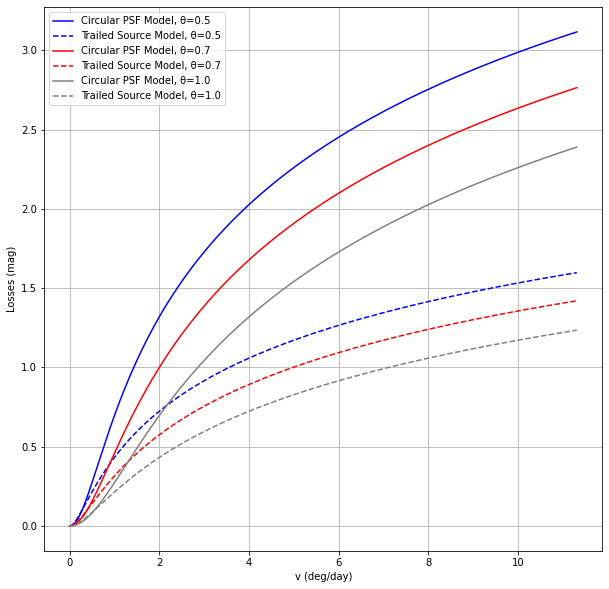

In [59]:
fig = plt.figure(figsize=(10, 10))
plt.plot(v, lossesCircularPSF5, color='blue', label='Circular PSF Model, θ=0.5')
plt.plot(v, lossesTrailedSource5, '--',color='blue', label='Trailed Source Model, θ=0.5')

plt.plot(v, lossesCircularPSF7, color='red', label='Circular PSF Model, θ=0.7')
plt.plot(v, lossesTrailedSource7, '--',color='red', label='Trailed Source Model, θ=0.7')

plt.plot(v, lossesCircularPSF10, color='gray', label='Circular PSF Model, θ=1.0')
plt.plot(v, lossesTrailedSource10, '--',color='gray', label='Trailed Source Model, θ=1.0')
#plt.title("θ = 0.5")
plt.legend()
#plt.xlim(0., 0.2)
plt.xlabel("v (deg/day)")
plt.ylabel("Losses (mag)")
plt.grid()
;

''

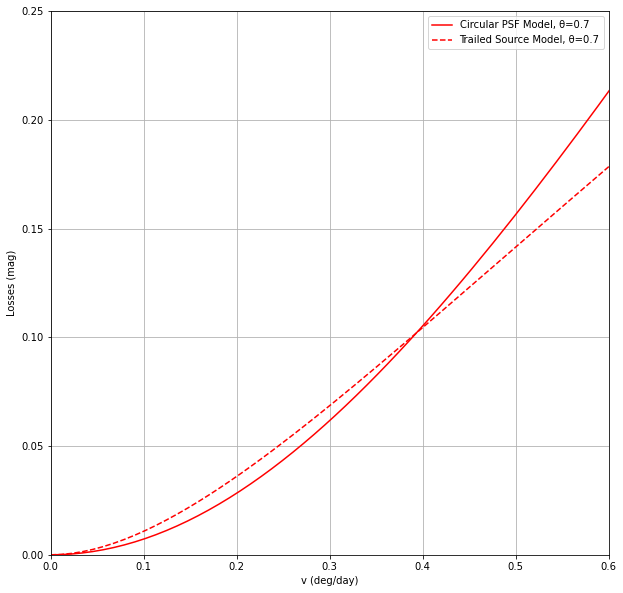

In [38]:
fig = plt.figure(figsize=(10, 10))

plt.plot(v, lossesCircularPSF7, color='red', label='Circular PSF Model, θ=0.7')
plt.plot(v, lossesTrailedSource7, '--',color='red', label='Trailed Source Model, θ=0.7')

plt.legend()

plt.xlim(0., 0.6)
plt.ylim(0., 0.25)

plt.xlabel("v (deg/day)")
plt.ylabel("Losses (mag)")
plt.grid()
;

In [64]:
R = np.array([1.1,3.,4.,30.]) 
typical_motions = 148.0*(1-R**-0.5)/(R-1) #arcsec/hour
typical_motions /= 3600.
typical_motions *= 24.

In [65]:
typical_motions

array([0.45916912, 0.2085072 , 0.16444444, 0.02781127])

''

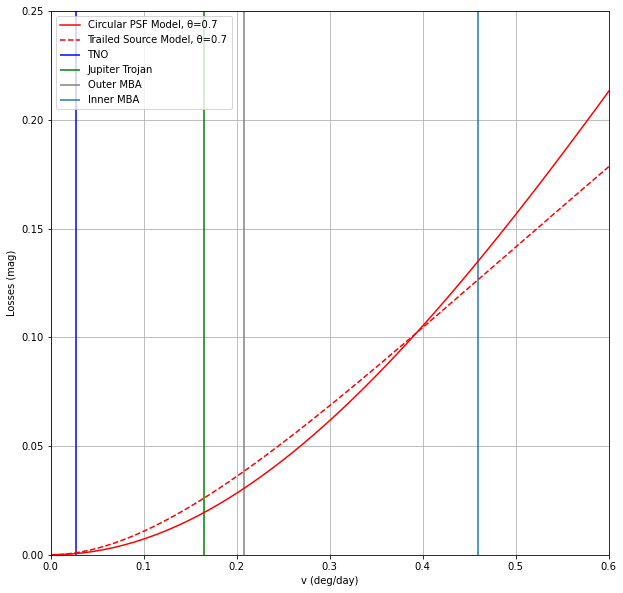

In [77]:
fig = plt.figure(figsize=(10, 10))

plt.plot(v, lossesCircularPSF7, color='red', label='Circular PSF Model, θ=0.7')
plt.plot(v, lossesTrailedSource7, '--',color='red', label='Trailed Source Model, θ=0.7')

plt.vlines(typical_motions[-1], 0.0, 2.5, label='TNO', color='b')
plt.vlines(typical_motions[-2], 0.0, 2.5, label='Jupiter Trojan', color='g')
plt.vlines(typical_motions[-3], 0.0, 2.5, label='Outer MBA', color='gray')
plt.vlines(typical_motions[-4], 0.0, 2.5, label='Inner MBA')

plt.legend()

plt.xlim(0., .6)
plt.ylim(0., 0.25)

plt.xlabel("v (deg/day)")
plt.ylabel("Losses (mag)")
plt.grid()
;